# Проектная работа

## Цель проекта

Разобраться в причинах убытков компании и дать рекомендации по выходу из сложившейся ситуации.

## Задачи проекта


* откуда приходят пользователи и какими устройствами они пользуются;

* сколько стоит привлечение пользователей из различных рекламных каналов;

* сколько денег приносит каждый клиент;

* когда расходы на привлечение клиента окупаются;

* какие факторы мешают привлечению клиентов.

## Поэтапный анализ данных

### Загрузите данные и подготовьте их к анализу


**Пути к файлам**\
(Из уважения к труду сотрудников Яндекс, готовящих датасеты, ссылки "битые")
- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](htt);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](htt);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](htt).

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

In [2]:
#Загружаем данные в переменные
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
#Получаем информацию о данных по визитам
print(visits.info())
print('_'*35)
display(visits.head(5))
print('_'*35)
for column in visits:
    print('*'*35)
    print(f'Подсчет топ-5 повторяющихся дубликатов в колонке {column}')
    print(visits[column].sort_values().head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
___________________________________


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


___________________________________
***********************************
Подсчет топ-5 повторяющихся дубликатов в колонке User Id
7045      599326
6247      599326
5537      599326
70796    4919697
71604    4919697
Name: User Id, dtype: int64
***********************************
Подсчет топ-5 повторяющихся дубликатов в колонке Region
284542    France
238939    France
238940    France
238943    France
279085    France
Name: Region, dtype: object
***********************************
Подсчет топ-5 повторяющихся дубликатов в колонке Device
248180    Android
94622     Android
94621     Android
244598    Android
94617     Android
Name: Device, dtype: object
***********************************
Подсчет топ-5 повторяющихся дубликатов в колонке Channel
275897    AdNonSense
222525    AdNonSense
299040    AdNonSense
210617    AdNonSense
259730    AdNonSense
Name: Channel, dtype: object
***********************************
Подсчет топ-5 повторяющихся дубликатов в колонке Session Start
461       2019-05

In [4]:
#проверим наличие абсолютно одинаковых записей в базе данных и выведем их на экран, если они есть:
dublicated_data = visits[visits.duplicated()]
print(dublicated_data)

Empty DataFrame
Columns: [User Id, Region, Device, Channel, Session Start, Session End]
Index: []


Из полученных данных мы видим:

1) Всего **6 колонок**, **309901 строк**;

2) Пропуски **отсутствуют**;

3) Наименования колонок **не соответсвуют** стандартам написания. Необходимо привести к нижнему регистру и пробелы заменить на "_";

4) На первый взгляд в каждой колонке присутстсвуют дубликаты. Однако, фактически их там нет. Одни и те же пользователи могли заходить с разных устройств, с разного ригиона в разное время и так далее. Проверка на наличие одинаковых записей говорит о том, что в данных с визитами **нет дубликатов**;

5) В данных присутсвует всего два типа данных : *int* и *object*. Изменений требует только два последних столбца : **дата и время начала сессии** и **дата и время окончания сессии**. Приведем данные к типу *дата*, чтобы удобнее было работать с этой колонкой в дальнейшем анализе. 

In [5]:
#приведём наименования колонок к правильному написанию(заменим регистр и заменим пробелы на *_*)
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [6]:
#приведем данные, содержащие информацию о времени начала и окончания сессий к нужному формату
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

Проверим, что получается после преобразования:

In [7]:
display(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

Наименования колонок приведены к хорошему тону написания, тип данных успешно изменён. Проведём такую же процедуру с другими массивами данных.

In [8]:
#Получаем информацию о данных по заказам
print(orders.info())
print('_'*35)
display(orders.head(5))
print('_'*35)
for column in orders:
    print('*'*35)
    print(f'Подсчет топ-5 повторяющихся дубликатов в колонке {column}')
    print(orders[column].sort_values().head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
___________________________________


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


___________________________________
***********************************
Подсчет топ-5 повторяющихся дубликатов в колонке User Id
324         599326
225         599326
268         599326
30223     46006712
15938    374052872
Name: User Id, dtype: int64
***********************************
Подсчет топ-5 повторяющихся дубликатов в колонке Event Dt
27978    2019-05-01 00:28:11
5        2019-05-01 01:56:28
7        2019-05-01 02:02:18
11       2019-05-01 02:21:45
6        2019-05-01 02:39:21
Name: Event Dt, dtype: object
***********************************
Подсчет топ-5 повторяющихся дубликатов в колонке Revenue
0        4.99
26519    4.99
26520    4.99
26521    4.99
26522    4.99
Name: Revenue, dtype: float64


In [9]:
#проверим наличие абсолютно одинаковых записей в базе данных и выведем их на экран, если они есть:
dublicated_data = orders[orders.duplicated()]
print(dublicated_data)

Empty DataFrame
Columns: [User Id, Event Dt, Revenue]
Index: []


Из полученных данных мы видим похожу картину:

1) Всего **3 колонки**, **40212  строк**;

2) Пропуски **отсутствуют**;

3) Наименования колонок **не соответсвуют** стандартам написания. Необходимо привести к нижнему регистру и пробелы заменить на "_";

4) На первый взгляд в каждой колонке присутстсвуют дубликаты. Однако, фактически их там нет. Ситуация идентична с предыдущей базой данных;

5) В данных присутсвует всего три типа данных : int, object, float. **Изменений требует** только один столбец : *дата совершения покупки*. Приведем данные к типу дата, чтобы удобнее было работать с этой колонкой в дальнейшем анализе. Колонка с суммой заказа не требует изменений, так как в данных указаны не целые числа, а дробные.

In [10]:
#приведём наименования колонок к правильному написанию(заменим регистр и заменим пробелы на *_*)
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [11]:
#приведем данные, содержащие информацию о времени покупки к нужному формату
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [12]:
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

Выведем первичную информацию по последней базе дынных.

In [13]:
#Получаем информацию о данных по расходам
print(costs.info())
print('_'*35)
display(costs.head(5))
print('_'*35)
for column in costs:
    print('*'*35)
    print(f'Подсчет топ-5 повторяющихся дубликатов в колонке {column}')
    print(costs[column].sort_values().head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
___________________________________


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


___________________________________
***********************************
Подсчет топ-5 повторяющихся дубликатов в колонке dt
0       2019-05-01
900     2019-05-01
540     2019-05-01
1080    2019-05-01
360     2019-05-01
Name: dt, dtype: object
***********************************
Подсчет топ-5 повторяющихся дубликатов в колонке Channel
900     AdNonSense
1016    AdNonSense
1017    AdNonSense
1018    AdNonSense
1019    AdNonSense
Name: Channel, dtype: object
***********************************
Подсчет топ-5 повторяющихся дубликатов в колонке costs
1656    0.80
762     1.26
795     1.26
763     1.44
1725    1.60
Name: costs, dtype: float64


In [14]:
#проверим наличие абсолютно одинаковых записей в базе данных и выведем их на экран, если они есть:
dublicated_data = costs[costs.duplicated()]
print(dublicated_data)

Empty DataFrame
Columns: [dt, Channel, costs]
Index: []


Из полученных данных мы видим похожу картину:

1) Всего **3 колонки**, **1800  строк**;

2) Пропуски **отсутствуют**;

3) Наименования колонок **не соответсвуют** стандартам написания. Необходимо привести к нижнему регистру колонку с идентификатором рекламного источника;

4) На первый взгляд в каждой колонке присутстсвуют дубликаты. Однако, фактически их там нет. Ситуация идентична с предыдущей базой данных;

5) В данных присутсвует всего два типа данных : object, float. **Изменений требует** только один столбец : *дата проведения рекламной кампании*. Приведем данные к типу дата, чтобы удобнее было работать с этой колонкой в дальнейшем анализе. Колонка с суммой затрат на рекламу не требует изменений, так как в данных указаны не целые числа, а дробные.

In [15]:
#приведём наименования колонок к правильному написанию(заменим регистр и заменим пробелы на *_*)
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

In [16]:
#приведем данные, содержащие информацию о времени покупки к нужному формату
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [17]:
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Следует так же проверить данные на наличие "артефактов". Для начала проверим, все ли временные диапазоны подходят под условие проекта. Данные были даны на *1 мая 2019 по 27 октября 2019*. Выведем самую раннюю и самую позднюю дату во всех базах данных. Если какая-либо из них выходит за диапазон, будем рассматривать их более детально. 

In [18]:
display(visits.sort_values(['session_start','session_end'], ascending=False).head(3))
print()
display(visits.sort_values(['session_start','session_end'], ascending=False).tail(3))

,user_id,region,device,channel,session_start,session_end
207201,184260303823,United States,iPhone,TipTop,2019-10-31 23:59:23,2019-11-01 01:38:46
309881,135388274315,UK,PC,LeapBob,2019-10-31 23:58:28,2019-11-01 00:36:06
207032,271825045458,United States,Android,TipTop,2019-10-31 23:56:54,2019-10-31 23:59:31


,user_id,region,device,channel,session_start,session_end
207335,86266511938,Germany,Android,organic,2019-05-01 00:02:38,2019-05-01 01:22:33
207360,428935481941,UK,PC,AdNonSense,2019-05-01 00:01:35,2019-05-01 02:30:30
461,382394863972,United States,Mac,MediaTornado,2019-05-01 00:00:41,2019-05-01 01:13:45


In [19]:
#мы видим, что в датафрейме visits самые ранние сесси началисб 1 мая, что подходит по условию задача
#однако самыые поздние начинаются и заканчиваются за диапазоном задачи. Необходимо их убрать(окончание сессии поставим
#лимит до 28 числа, ибо она могла начаться ночью 27-ого числа, а окончиться уже 28 числа)
#Данных вне диапазона всего 2%, поэтому смело можем убирать их
visits = visits.query('session_start <= "2019-10-27" & session_end <= "2019-10-28"')

In [20]:
display(orders.sort_values('event_dt',ascending=False).head(3))
print()
display(orders.sort_values('event_dt',ascending=False).tail(3))

,user_id,event_dt,revenue
27897,271825045458,2019-10-31 23:56:56,4.99
40177,972738370998,2019-10-31 23:43:41,4.99
27970,752465387057,2019-10-31 23:33:38,9.99


,user_id,event_dt,revenue
7,914062168985,2019-05-01 02:02:18,4.99
5,129100331057,2019-05-01 01:56:28,4.99
27978,969802935876,2019-05-01 00:28:11,4.99


In [21]:
#видим в данном датафрейме такую картину, как в visits. Данных вне диапазона порядка 3.6%, поэтому убираем
orders = orders.query('event_dt <= "2019-10-27" & event_dt <= "2019-10-28"')

In [22]:
#проверим costs
display(costs.sort_values('dt',ascending=False).head(3))
print()
display(costs.sort_values('dt',ascending=False).tail(3))

,dt,channel,costs
1799,2019-10-27,lambdaMediaAds,12.00
1439,2019-10-27,OppleCreativeMedia,17.75
899,2019-10-27,YRabbit,11.07


,dt,channel,costs
360,2019-05-01,RocketSuperAds,21.06
180,2019-05-01,MediaTornado,6.24
900,2019-05-01,AdNonSense,40.95


В данном датафрейме все значения входят в диапазон.

Проведя первичный осмотр данных, были сделаны следующие действия:

* Во всех базах данных наименования колонок были приведены к верному формату(изменен регистр написания и к змеиному типу написания)

* Дубликаты во всех трёх базах данных отсутсвуют 

* Пропуски значений во всех трёх базах данных отсутсвуют 

* Часть записей в каждой из баз данных были приведены к верному типу данных, в частности все записи, содержащие даты событий

* Часть данных была исключена из анализа, так как они не входят во временной диапазон исследования

Проверим еще дополнительно длин сессии и посмотрим на самые длиные и короткие.

In [23]:
visits['session_duration'] = visits['session_end'] - visits['session_start']
visits.sort_values('session_duration')

,user_id,region,device,channel,session_start,session_end,session_duration
139771,42050466664,United States,Mac,organic,2019-09-10 02:28:51,2019-09-10 02:28:51,0 days 00:00:00
7658,691394091917,United States,iPhone,organic,2019-05-09 19:23:10,2019-05-09 19:23:10,0 days 00:00:00
293002,604252823044,France,PC,LeapBob,2019-10-04 07:28:42,2019-10-04 07:28:42,0 days 00:00:00
149553,310325030127,United States,iPhone,TipTop,2019-09-18 06:48:19,2019-09-18 06:48:19,0 days 00:00:00
46858,316398993849,United States,Android,organic,2019-06-19 17:09:41,2019-06-19 17:09:41,0 days 00:00:00
...,...,...,...,...,...,...,...
60721,14446585295,United States,iPhone,TipTop,2019-07-01 13:45:35,2019-07-01 19:09:40,0 days 05:24:05
125273,756059349656,United States,iPhone,FaceBoom,2019-08-28 20:34:33,2019-08-29 02:01:09,0 days 05:26:36
218941,123964463828,UK,Android,WahooNetBanner,2019-05-24 16:16:36,2019-05-24 21:43:53,0 days 05:27:17
49192,485412247357,United States,Android,FaceBoom,2019-06-21 04:11:31,2019-06-21 09:47:12,0 days 05:35:41


В самом начале сортировки мы видим, что есть сессии длившиеся 00 минут 00 секунд. Необходимо понять причину таких явлений. Возможно, это технический сбой при сборе данных. В любом случае, предлагаем оставить данные записи, чтобы более точно провести дальнейший анализ, особенно, если среди таких пользователей с нулевой сессией есть оплачиваемые. Данный факт далее будем рассматривать в рекомендациях к улучшению работы сервиса.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [24]:
#Создадим функцию профилей пользователей
# функция для создания пользовательских профилей

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [25]:
#Создадим функцию для рассчёта Retention Rate

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [26]:
#Создадим функцию для рассчёта Conversion Rate 
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [27]:
#Создадим функцию для расчёта LTV
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [28]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [29]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [30]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [31]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [32]:
#Построим таблицу профилей на основе уже сделанной ранее функции
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [33]:
#Проверим, какая самая рання дата привлечения, а какая самая поздняя.
#Датой привлечения считаем дату, при которой клиент зашел на сайт и оформил покупку
profiles.query('payer == True') #отфильтруем платящих пользователей от неплатящих
print('Самая рання дата привлечения:',profiles['dt'].min())
print('Самая поздняя дата привлечения:',profiles['dt'].max())

Самая рання дата привлечения: 2019-05-01
Самая поздняя дата привлечения: 2019-10-26


Самой ранней датой и самой поздней датой привлечения являются временные границы исследования: *1 мая и 26 октября* соответственно. 

In [34]:
#Сгруппируем данные по дате и отсортируем по общему кол-ву посетителей 
profiles_dt = (profiles.groupby('dt')
               .agg({'user_id': 'nunique'})
               .sort_values(by='user_id',ascending=False).rename(columns = {'user_id':'users_qty'})
              )

profiles_dt.head(10)

,users_qty
dt,
2019-09-28,1256
2019-09-29,1243
2019-09-27,1212
2019-09-22,1179
2019-09-30,1117
2019-06-30,1112
2019-10-06,1102
2019-09-24,1086
2019-10-05,1082


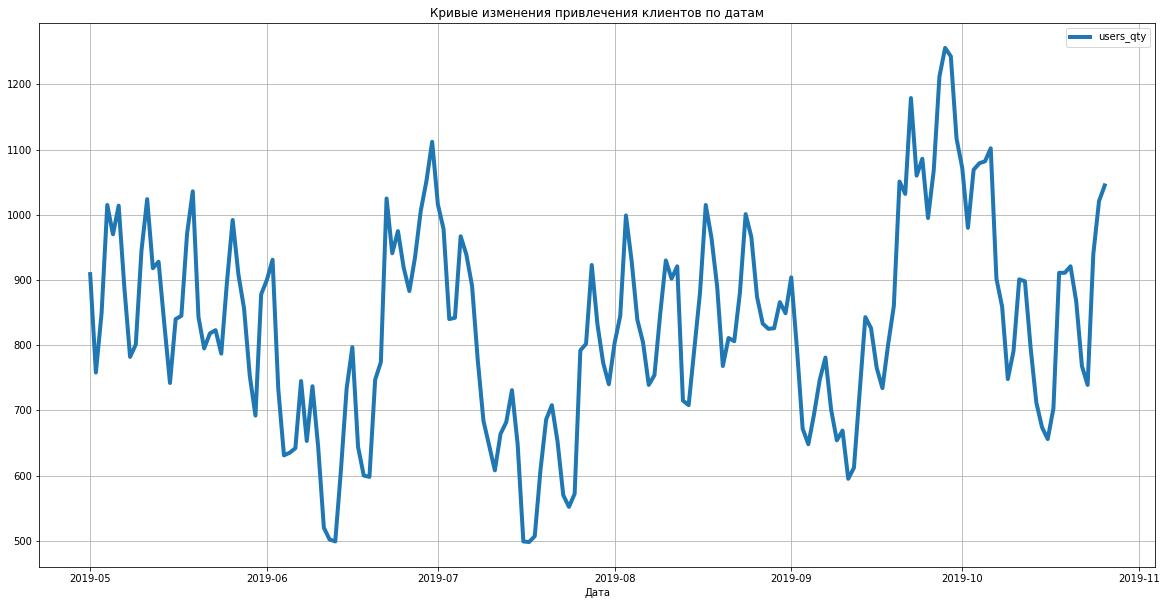

In [35]:
profiles_dt.plot(figsize=(20,10), linewidth=4, grid=True)
plt.xlabel('Дата')
plt.title('Кривые изменения привлечения клиентов по датам')
None

Исходя из данных таблицы и графиков, пик привлечения приходился на **28 сентября 2019 года** - порядка *1256 уникальных пользователей*. Наименьшее колличество посетителей приходилось на **7 июля 2019 года** - *498 пользователей*. 

In [36]:
#Сгруппируем данные по региону и отсортируем по общему кол-ву посетителей, которые делали покупки и посчитаем долю платящих
profiles_region = profiles.groupby('region').agg({'user_id':'nunique', 'payer': ['sum', 'mean']})
profiles_region.columns = ['Итого пользователи', 'Платящие пользователи', '% платящих пол-лей']
profiles_region.sort_values(by = 'Итого пользователи', ascending = False).style.format({'% платящих пол-лей': '{:.2%}'})

,Итого пользователи,Платящие пользователи,% платящих пол-лей
region,,,
United States,99283,6814,6.86%
UK,17436,688,3.95%
France,17326,648,3.74%
Germany,14876,610,4.10%


Исходя из полученных данных, можем сделать вывод, что основная доля пользователей, осуществляющих покупки из **США** - *6814	 уникалных пользователей*, порядка **6.86%** от общего числа всех пользователей. 

In [37]:
#Сгруппируем данные по устройству и отсортируем по общему кол-ву посетителей, которые делали покупки
profiles_device = profiles.groupby('device').agg({'user_id':'nunique', 'payer': ['sum', 'mean']})
profiles_device.columns = ['Итого пользователи', 'Платящие пользователи', '% платящих пол-лей']
profiles_device.sort_values(by = 'Итого пользователи', ascending = False).style.format({'% платящих пол-лей': '{:.2%}'})

,Итого пользователи,Платящие пользователи,% платящих пол-лей
device,,,
iPhone,54058,3338,6.17%
Android,34769,2020,5.81%
PC,30232,1508,4.99%
Mac,29862,1894,6.34%


Исходя из полученных данных, наибольшая доля платящих пользователей пользовались **iPhone** - *3382 пользователей*, что составляет 6.17% среди пользователей данного устройства. Чуть меньше пользователей используют **Android** = *2020 пользователей*  - 5.81%. У **MAC** - *1894 пользователей*, доля платящих среди данного устройства наивысшая среди всех устройств - *6.34%*. Платящих пользователей **PC** - *1508 пользователей* - 4.99%.

In [38]:
#Сгруппируем данные по источнику рекламы и отсортируем по общему кол-ву посетителей, которые делали покупки
profiles_channel = (profiles.query('payer == True')
                  .groupby('channel')
                  .agg({'user_id': 'nunique'})
                  .sort_values(by='user_id',ascending=False).rename(columns = {'user_id':'users_qty'})
                  )

profiles_channel = profiles.groupby('channel').agg({'user_id':'nunique', 'payer': ['sum', 'mean']})
profiles_channel.columns = ['Итого пользователи', 'Платящие пользователи', '% платящих пол-лей']
profiles_channel.sort_values(by = 'Итого пользователи', ascending = False).style.format({'% платящих пол-лей': '{:.2%}'})

,Итого пользователи,Платящие пользователи,% платящих пол-лей
channel,,,
organic,56077,1148,2.05%
FaceBoom,28937,3514,12.14%
TipTop,19391,1852,9.55%
OppleCreativeMedia,8536,232,2.72%
LeapBob,8495,255,3.00%
WahooNetBanner,8486,443,5.22%
RocketSuperAds,4413,348,7.89%
MediaTornado,4343,155,3.57%
YRabbit,4268,161,3.77%


Исходя из полученных данных, наибольшая доля платящих пользователей пришли из **FaceBoom** - *3514 пользователей* (12.14%). Чуть меньше платящих пользователей из **AdNonSense** = *430	 пользователей* (11.18%). Далее **lambdaMediaAds** : *222 пользователя*, что является *10.42%*.  Наименьшая доля платящих пользователей **organic** - *1148 пользователей* (2.05%), но данные пользователи пришли сами, бесплатно. 

Проведя первичный анализ данных, мы можем выделить ряд выводов:

1) Пик привлечения приходился на **28 сентября 2019 года** - *порядка 1256 уникальных пользователей*. Наименьшее колличество посетителей приходилось на **7 июля 2019 года** - *498 пользователей*. Самая ранняя дата привлечения - **1 мая 2019**, а самая поздняя дата - **26 октября 2019**;

2) Основная доля пользователей, осуществляющих покупки - **из США** - *6814 уникалных пользователей*, порядка **6.86%**;

3) Наилучшие показатели плательщиков у клиентов, пользующихся устройством **Mac** - *6.34%*, наихудшая у **PC** - *4.99%*;

4) Наибольшее колличество платящих пользователей пришли из **FaceBoom** - *3514 пользователей (12.14%)*. Чуть меньше пользователей из **AdNonSense** = *430 пользователей (11.18%)*. Наименьшая доля платящих **organic** - *1148 пользователей (2.05%)*.

In [39]:
#Определяем, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 
#Строим таблицу

report = profiles.groupby('region').agg({'user_id':'nunique', 'payer': ['sum', 'mean']})
report.columns = ['Итого пользователи', 'Платящие пользователи', '% платящих пол-лей']
report.sort_values(by = 'Итого пользователи', ascending = False).style.format({'% платящих пол-лей': '{:.2%}'})

,Итого пользователи,Платящие пользователи,% платящих пол-лей
region,,,
United States,99283,6814,6.86%
UK,17436,688,3.95%
France,17326,648,3.74%
Germany,14876,610,4.10%


### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [40]:
#Посчитаем общую сумму расходов на маркетинг
total_costs = round(costs['costs'].sum(),2)
print(total_costs)

105497.3


In [41]:
#Построим таблицу с распределением затрат на маркетинг по каждому источнику рекламы
costs_channel = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by = 'costs', ascending = False)
display(costs_channel)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


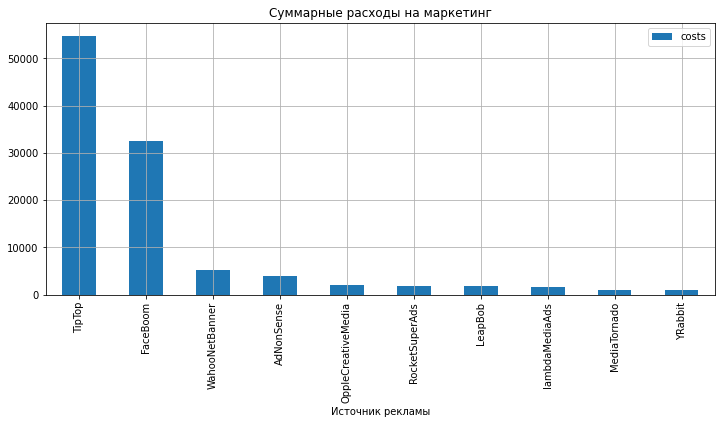

In [42]:
#Визуализируем данные
costs_channel.plot(kind='bar', grid=True, figsize=(12,5))
plt.xlabel('Источник рекламы')
plt.title('Суммарные расходы на маркетинг')
None

Исходя из увиденного, общая сумма расходов на маркетинг составляет **105497** условных едениц, из которых основная часть приходятся на **TipTop** и **FaceBoom** соответственно. 

Посмотрим на динамику изменения расходов во времени.

In [43]:
#Сначала построим график изменения по-месячно. 
#Для этого создадим две колонки с номером недели и месяцем в отдельном датафрейме

costs_raw = costs.copy()
costs_raw['dt'] = pd.to_datetime(costs_raw['dt'])
costs_raw['week'] = costs_raw['dt'].dt.isocalendar().week
costs_raw['month'] = costs_raw['dt'].astype('datetime64[M]')
costs_raw.head(5)

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,2019-05-01
1,2019-05-02,FaceBoom,78.1,18,2019-05-01
2,2019-05-03,FaceBoom,85.8,18,2019-05-01
3,2019-05-04,FaceBoom,136.4,18,2019-05-01
4,2019-05-05,FaceBoom,122.1,18,2019-05-01


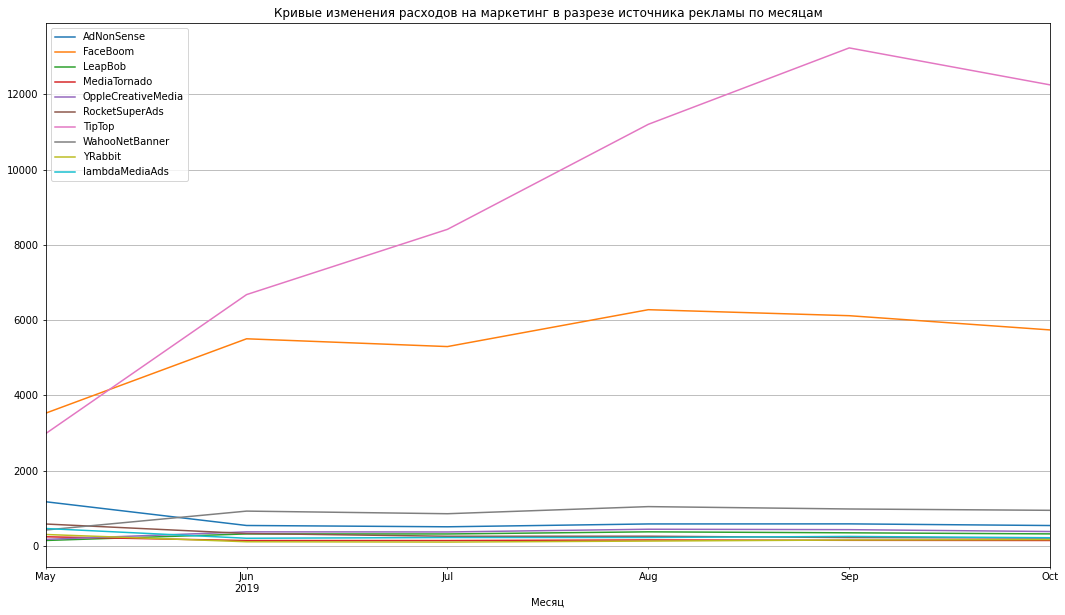

In [44]:
costs_raw.pivot_table(
    index='month',  
    columns='channel', 
    values='costs', 
    aggfunc='sum'
).plot(figsize=(18, 10), grid=True, )
plt.legend(loc='upper left')
plt.xlabel('Месяц')
plt.title('Кривые изменения расходов на маркетинг в разрезе источника рекламы по месяцам')
plt.show()

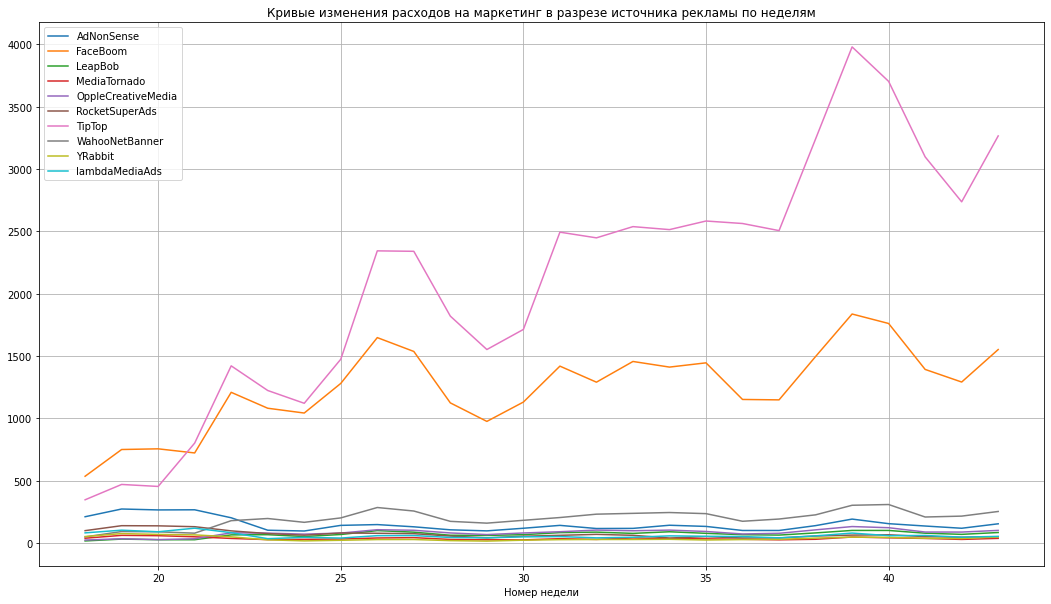

In [45]:
#Теперь построим график изменения понедельно
costs_raw.pivot_table(
    index='week',  
    columns='channel', 
    values='costs', 
    aggfunc='sum'
).plot(figsize=(18, 10), grid=True, )
plt.legend(loc='upper left')
plt.xlabel('Номер недели')
plt.title('Кривые изменения расходов на маркетинг в разрезе источника рекламы по неделям')
plt.show()

Из графиков мы видим, что понедельное отображение графиков более точно показывает изменение затрат на каждый источник рекламы, в то время как график по-месячно более "гладкий" и показывает общую тенденцию. Однако, различаются "хвосты" графиков. В помесячном под конец периода исследования у топ-2 источника по расходам видна нисходящая тенденция, в то время как в по-недельном последний период показывает рост затрат. 

В целом, за весь период исследования видны лидеры по затратам : 

1) TipTop

2) FaceBoom

В эти два источника больше всего вкладывалась компания и повышала уровень затрат на них. Так, если считать понедельно, то  на начало исследовательского периода уровень затрат **TipTop** - в районе *400* условных едениц, а у **FaceBoom** - чуть больше *500*. А в конце последней недели у **TipTop** - в районе *3400* условных едениц, а у **FaceBoom** - чуть больше *1500* условных едениц. 

Остальные источники показывают примерно одинаковую динамику и уровень затрат еженедельно и ежемесячно и остаются на примерно одинаковом уровне что с начала исследуемого периода, что на его конец. 

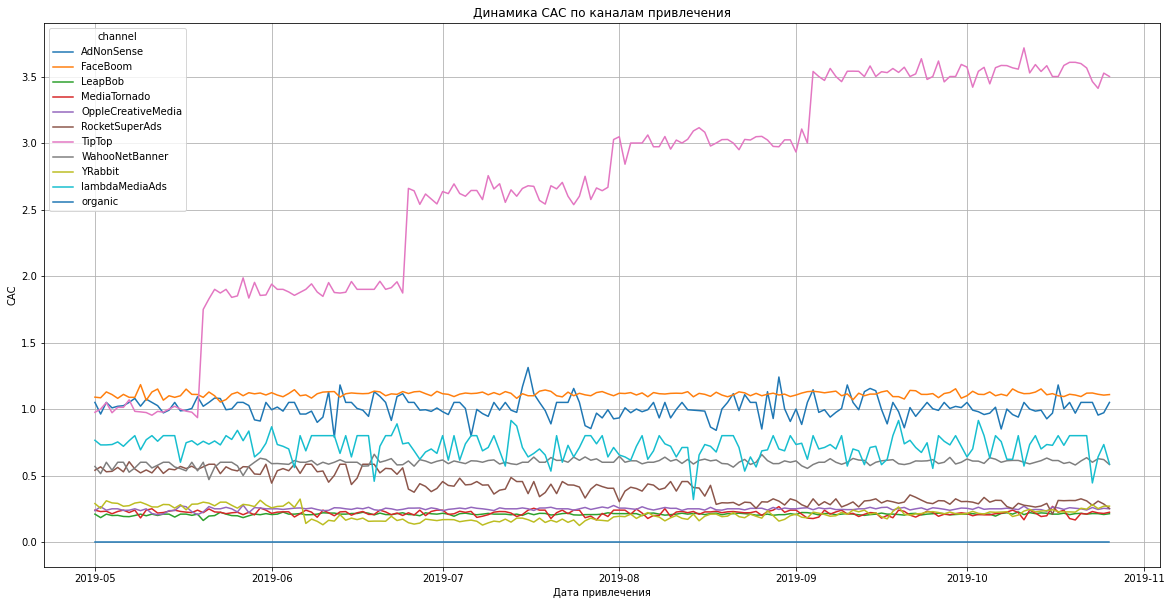

In [46]:
#Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(20, 10))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Стоимость привлечения **органических** пользователей равна нулю, потому что они перешли на сайт самостоятельно, а не благодаря рекламе.

Наиболее "дорогими" пользователи являются клиенты из кагорт сентябрь-ноябрь, привлеченных из **TipTop**. Стоимость привлечения этой кагорты составляет порядка *3.5 условных едениц*. 

Вторая позиция по общим затратам на маркетинг "FaceBoom" имеет стоимость привлечения одного клиента на протяжении всего периода исследования составляет чуть больше *1 условной еденицы*. Схожую стоииость привлечения имеет так же **AdNonSense**. 

**Остальные источники** привлечения имеют CAC на уровне менее *1 условной еденицы*. 

Подведя итог по данному шагу, можно сделать ряд выводов:

1) Общая сумма расходов на маркетинг составляет *105497 условных едениц*, из которых основная часть приходятся на **TipTop** и **FaceBoom** соответственно. В эти два источника больше всего вкладывалась компания и повышала уровень затрат на них. Остальные источники показывают примерно одинаковую динамику и уровень затрат еженедельно и ежемесячно и остаются на примерно одинаковом уровне что с начала исследуемого периода, что на его конец.

2) Стоимость привлечения **органических** пользователей равна нулю, потому что они перешли на сайт самостоятельно, а не благодаря рекламе. Наиболее "дорогими" пользователи являются клиенты из кагорт *сентябрь-ноябрь*, привлеченных из **TipTop**. Стоимость привлечения этой кагорты составляет порядка *3.5 условных едениц*. Вторая позиция по общим затратам на маркетинг **FaceBoom** имеет стоимость привлечения одного клиента на протяжении всего периода исследования составляет чуть больше 1 условной еденицы. Схожую стоииость привлечения имеет так же **AdNonSense**. Остальные источники привлечения имеют CAC на уровне менее 1 условной еденицы.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [47]:
#Перед анализом отфильтруем органических пользователей, так как за их привлечение компания не тратила денежные средства
profiles = profiles.query('channel != "organic"')

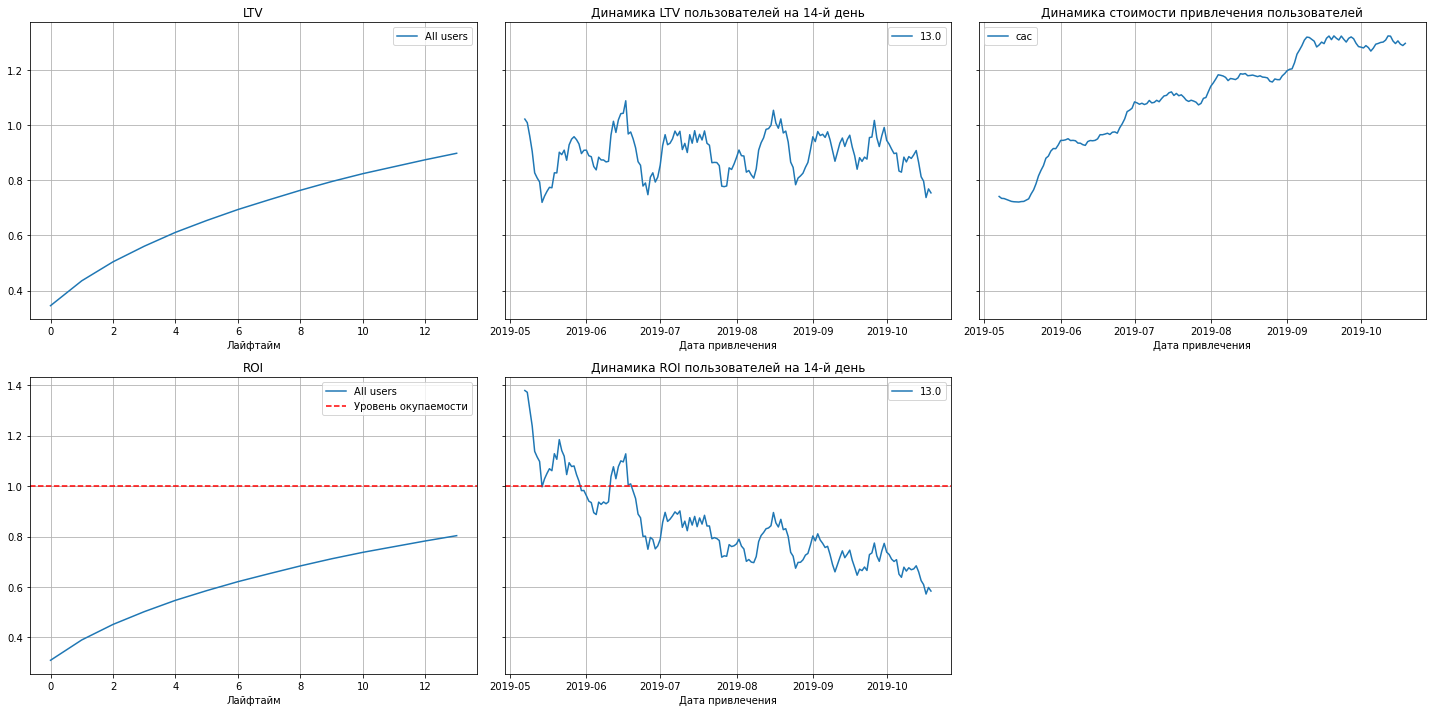

In [48]:
#Построим графики для исследования окупаемости рекламы
observation_date = datetime(2019, 11, 1).date() 
horizon_days = 14 

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По данным графика мы можем видеть следующее: 

1) LTV имеет *сезонный характер*, но в течение исследовательского периода он находится в пределах одного показателя. 

2) Реклама не окупается. Скорее всего, проблема с расходами на рекламу. Проверим динамику стоимости привлечения.

3) По графикам динамики стоимости привлечения мы видим, что с середины мая резко возрастают расходы на привлечение клиентов, как раз в этом периоде ROI начал резкое падение на предыдущем графике. И начиная с этого периода расходы на привлечение не окупались. 

Для понимания причины неокупаемости рекламы, построим графики конверсии и удержания по всем возможным характеристикам: 

* Устройство пользователя;

* Региона пользователя;

* Источника привлечения пользователя

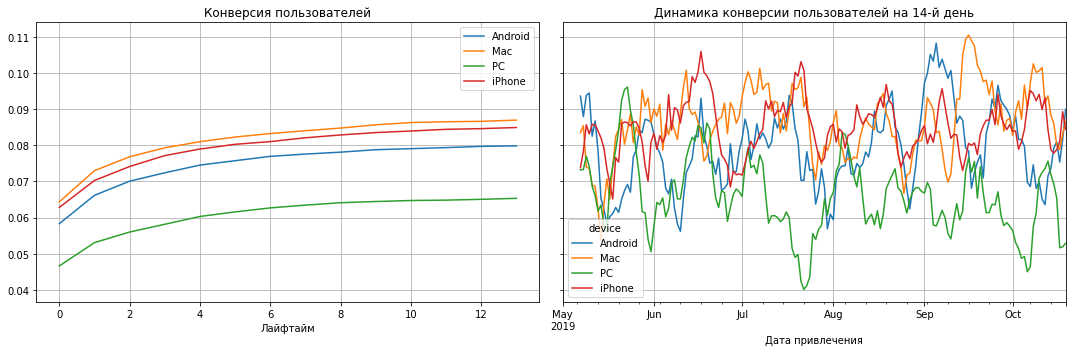

In [49]:
#Построим графики конверсии пользователей для каждого устройства
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

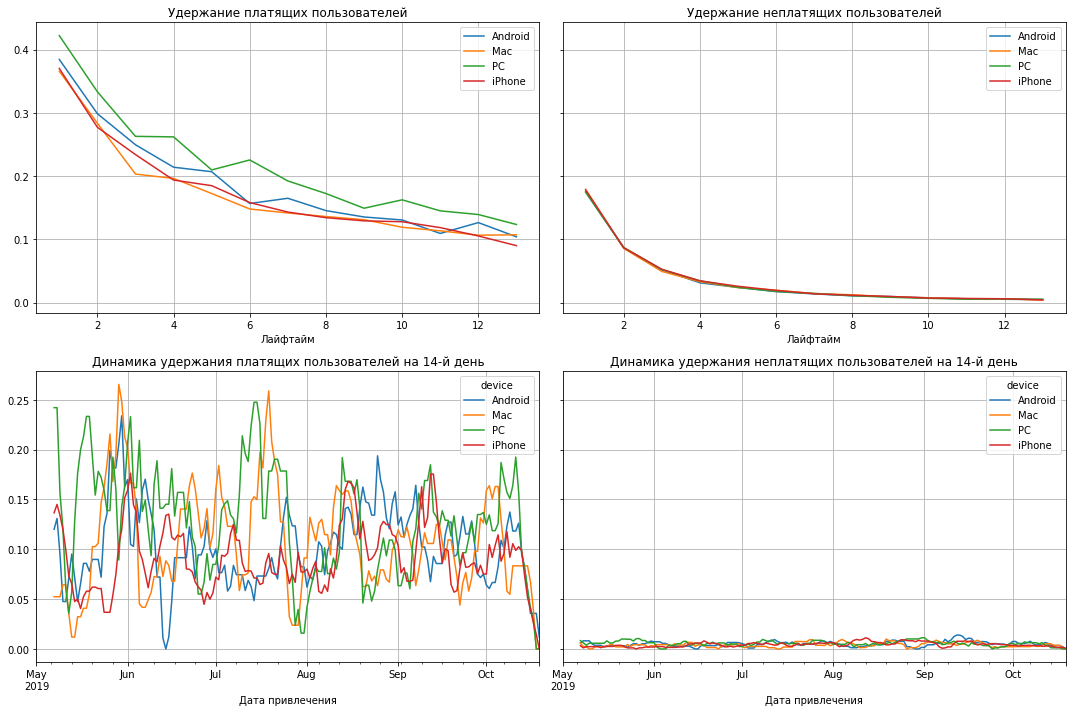

In [50]:
#Построим графики удержания платящих и неплатящих пользователей для каждого устройства
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Наилучная *конверсия* у пользователей **Mac**, наихудший показатель у пользователей **PC**. Такая же тенденция просматривается и на каждый 14-ый день исследуемого периода. 

*Удержание* платящих и неплатящих пользоватей стабильно падает у **всех** пользователей в разрезе устройств. Каждый 14-ый день так же показывает стабильно нисходящую тенденцию начиная с середины октября. 

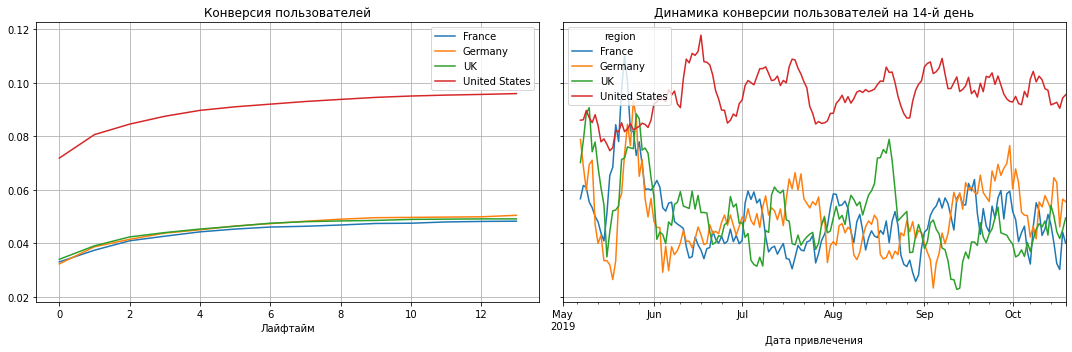

In [51]:
#Построим графики конверсии пользователей для каждого региона
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

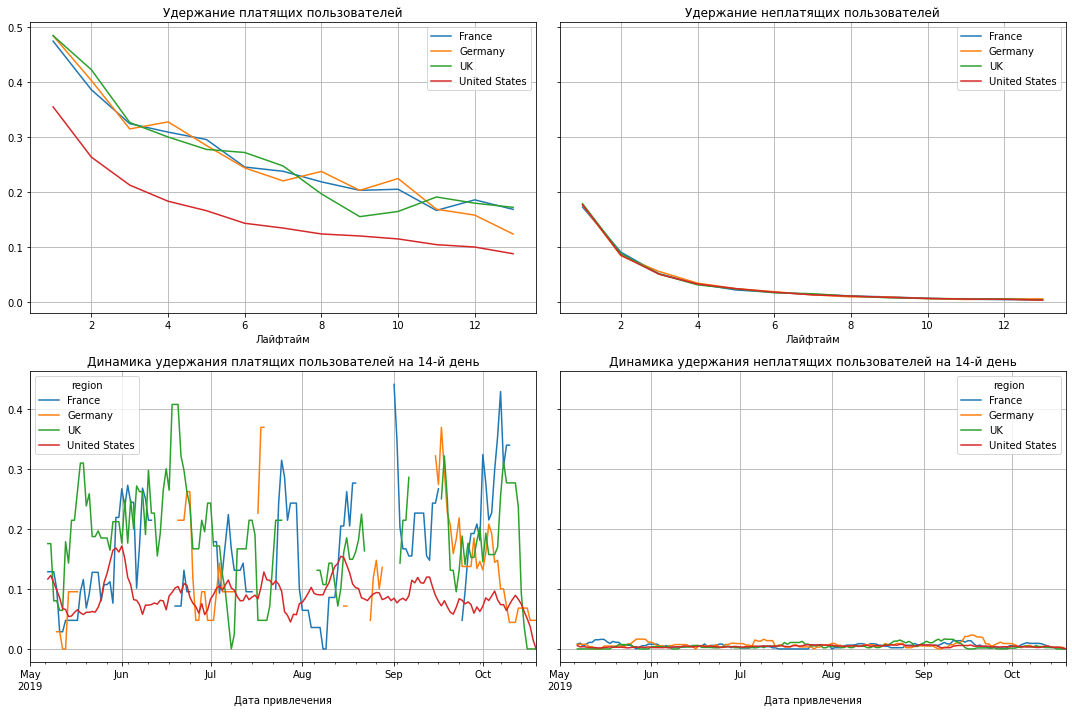

In [52]:
#Построим графики удержания платящих и неплатящих пользователей для каждого региона
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Из графиков заметно, что наиболее охотно *конвертируются* пользователи из **США**. **Франция**, **Германия** и **Англия** находятся на примерно одном уровне. Разбивка конвертации на каждый 14-ый день подтверждает вышеуказанное. 

*Удержание* платящих и неплатящих пользователей показывают такую же нисходящую тенеденцию, как и в разбивке до. Интересно, что наихудший показатель у **США**. У остальных стран этот показатель выше. Динамика *удержания* платящих пользователей на 14-ый день отражает такую же картину.

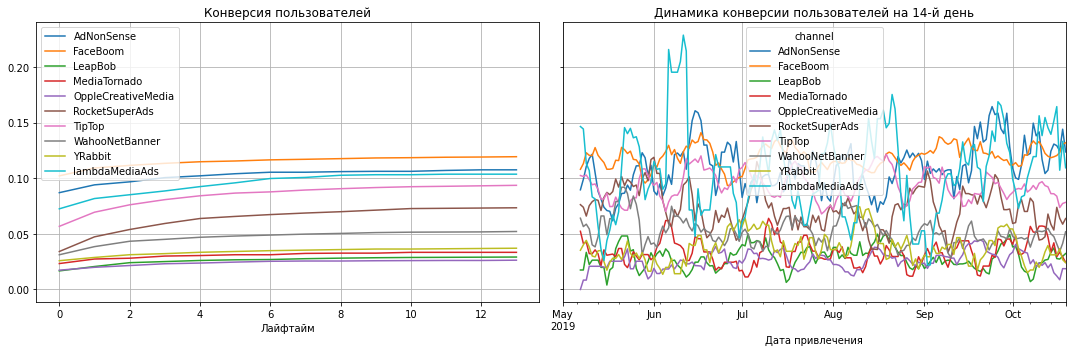

In [53]:
#Построим графики конверсии пользователей для каждого источника привлечения
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

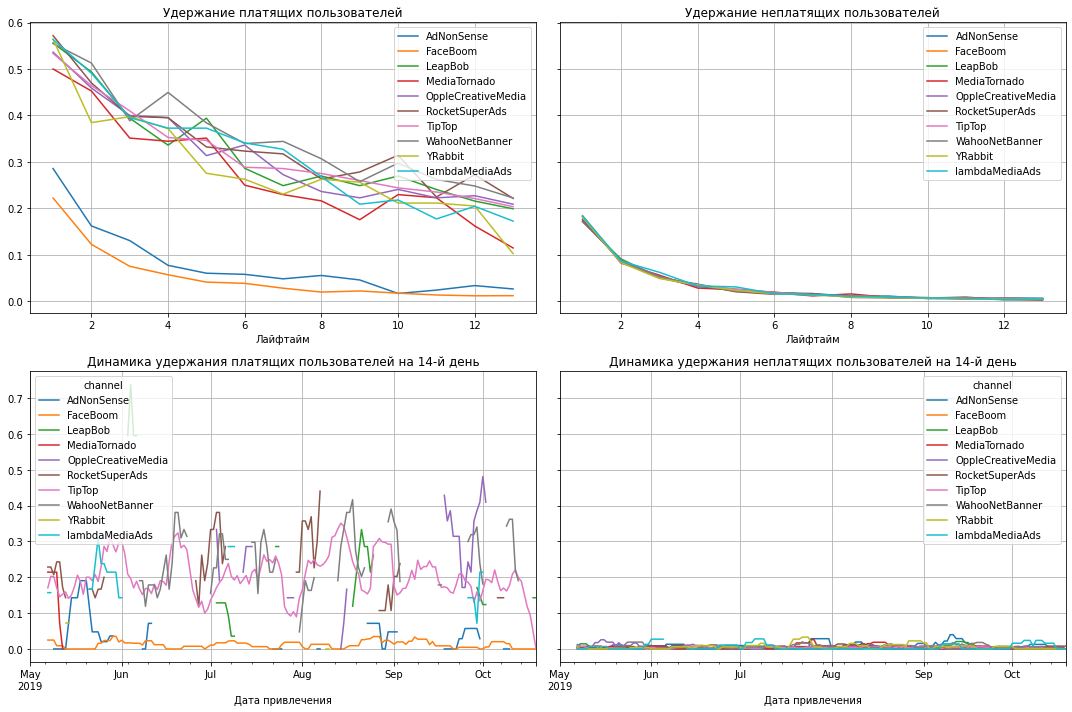

In [54]:
#Построим графики удержания платящих и неплатящих пользователей для каждого источника привлечения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Из графиков видим, что наибольшую *конвертацию* показывают пользователи, пришедшие из **Faceboom**, **AdNoneSense**, **lambdaMedianAds** соответственно. 

*Удержание* платящих и неплатящих пользователей показывают нисходящую тенеденцию на протяжении всего лайфтайма. Самые низкие показатели у **FaceBoom**.

Исходя из графиков анализа *конверсии* и *удержания* мы можем заметить, что по всем разбивкам удержание пользователей страдает. Однако, были замечаны некоторые особенности: 

1) Высокая степень конверсии пользователей **iPhone** и **Mac** сопровождаются наименьшей динамикой удержания пользоваталей;

2) Относительно высокий уровень конверсии пользователей из **США** показывает наихудший уровень удержания;

3) Пользователи, пришедшие из **FaceBoom** хуже всех удерживаются.

Для того, чтобы окончательно понять, в чем причина появления убытков, изучим LTV, динамику стоимости привлечения и ROI в разбивке по утройствам, странам и ресурсу привлечения. 

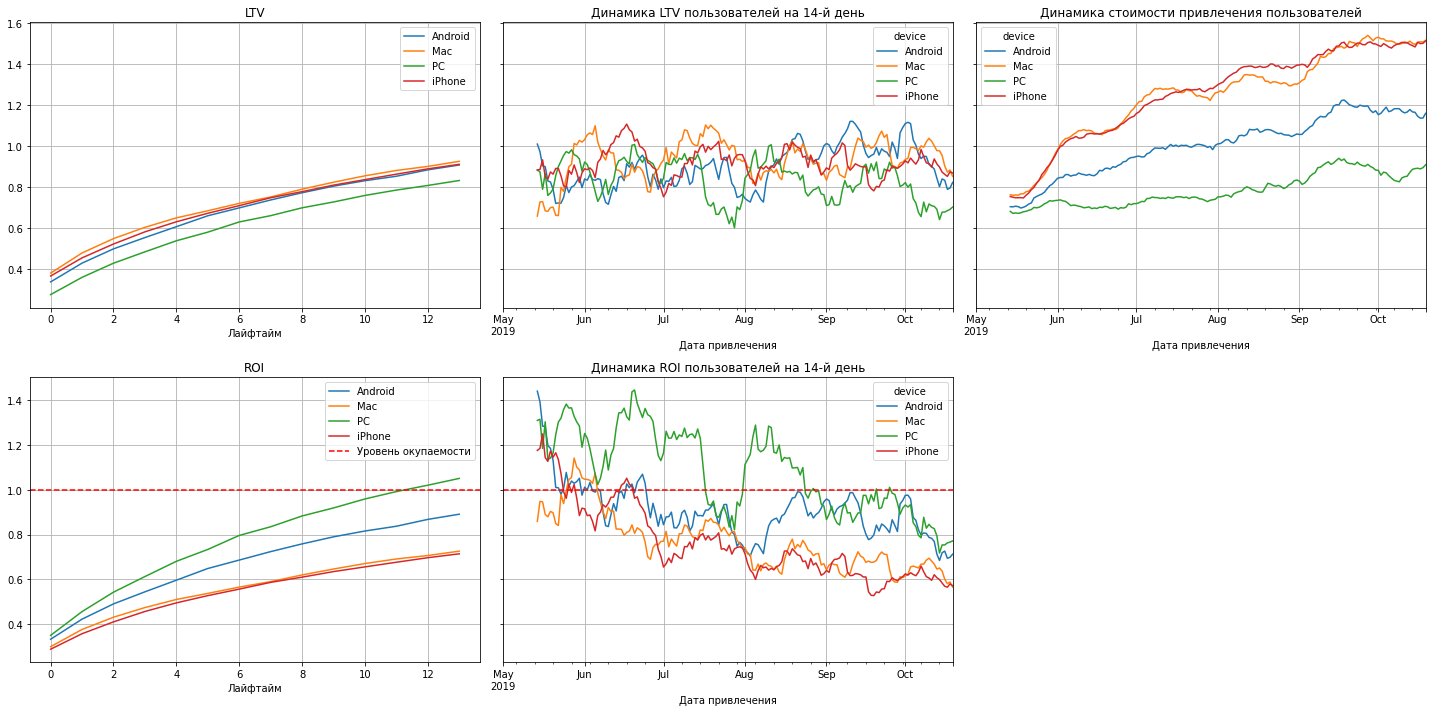

In [55]:
#Проанализируем окупаемость рекламы с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Из графиков мы видим, наибольший LTV у пользователей **Mac** и **iPhone**, но и стоимость привлечения пользователей с данными устройствами наивысшая. **Android** имеет такой же LTV, как у двух первых, но затрат на их привлечение меньше. Наименьший LTV у **PC**, ровно как и стоимость их привлечения. 

Рекламная политика окупается у пользователей **PC**, а у **Mac**, **Android** и **iPhone** она не окупается вовсе. 

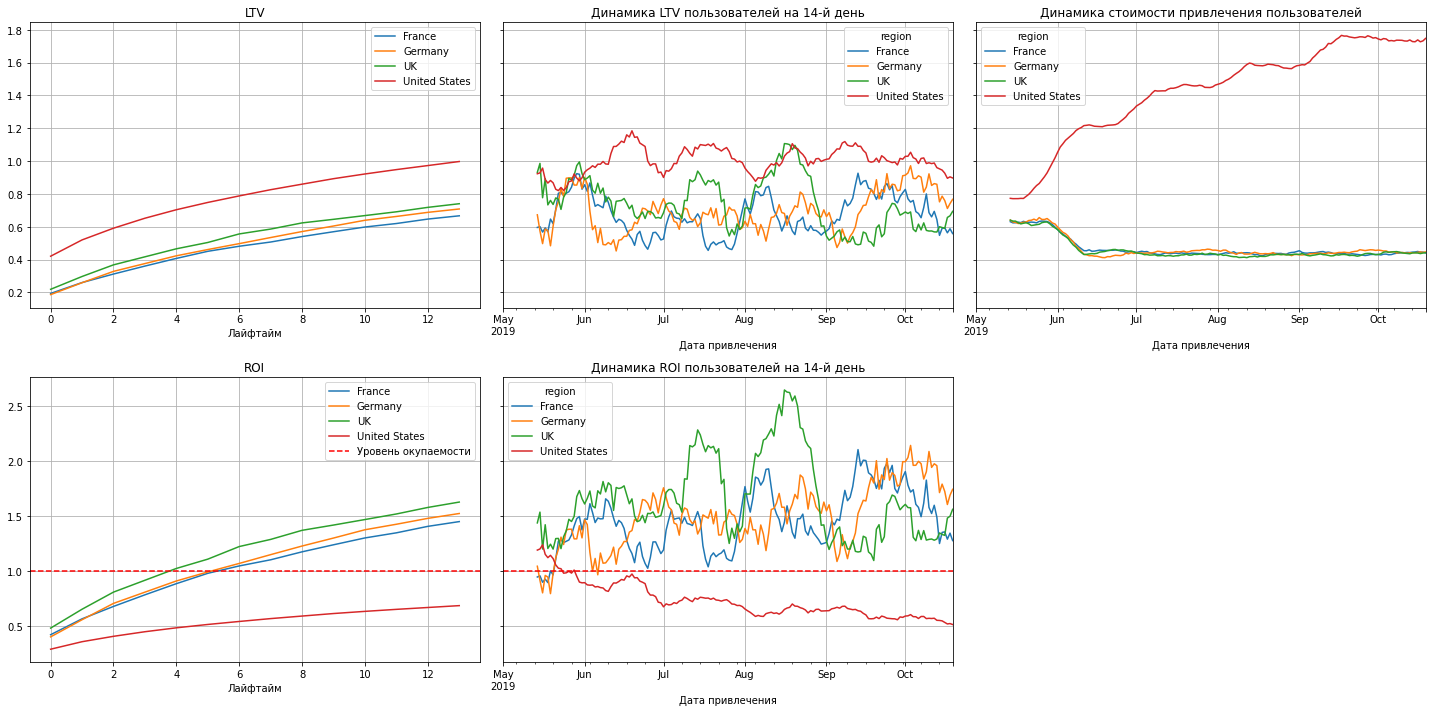

In [56]:
#Проанализируем окупаемость рекламы с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Из графиков мы видим, наибольший LTV у пользователей из **США**, у остальных стран он на примерно одном уровне. А вот в стоимости привлечения мы видим явный скачок для привлечения пользователей из **США**. Уровень расходов намного выше. чем у остальных стран. Судя по всему, компания работает точечно только для одного рынка, почти не вкладывая в привлечение клиентов из других регионов. 

Реклама окупается во всех странах, кроме **США**. Причем для пользователей из стран *не из США* она окупается очень эффективно. 

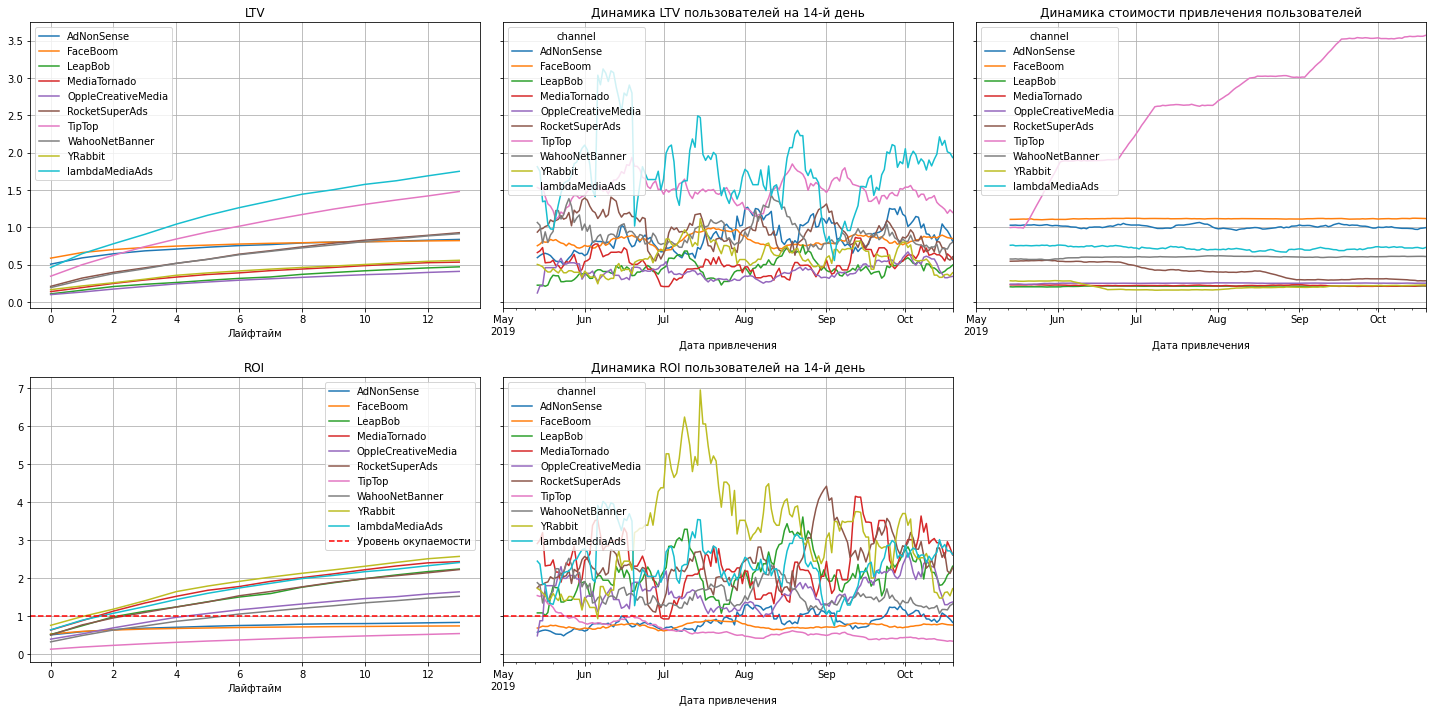

In [57]:
#Проанализируем окупаемость рекламы с разбивкой по рекламным каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Из графиков мы видим, наибольший LTV у пользователей, пришедших из **lambdaMediaAds**, далее идет **TipTop**. Если смотреть на дикамику затрат, то мы видим, что второй по ценности ресурс **TipTop** имеет несравнительно завышеный уровень затрат на привлечение, при условии, что затраты на лидера LTV заметно меньше. 

Реклама очень хорошо окупается на всех площадках, кроме **AdNonSense**, **TipTop**, **FaceBoom**.

Проведя анализ, мы заметили, что в целом реклама совсем не окупается, а расходы на маркетинг в исследуемом периоде очень сильно возрасли и продолжают расти. 

Рассмотрев показатели детально, мы можем константировать:

1) По всем разбивкам удержание пользователей страдает. Однако, были замечаны некоторые особенности:

* Высокая степень конверсии пользователей **iPhone** и **Mac** сопровождаются наименьшей динамикой удержания пользоваталей;

* Относительно высокий уровень конверсии пользователей из **США** показывает наихудший уровень удержания;

* Пользователи, пришедшие из **FaceBoom** хуже всех удерживаются.

2) Наибольший LTV у пользователей **Mac**, **Android** и **iPhone**, но и стоимость привлечения пользователей с данными устройствами наивысшая. Наименьший LTV у **PC**, ровно как и стоимость их привлечения.

Рекламная политика окупается у пользователей  **PC**, а у **Mac**, **Android** и **iPhone** она не окупается вовсе.

5) Наибольший LTV у пользователей из **США**, у остальных стран он на примерно одном уровне. А вот в стоимости привлечения мы видим явный скачок для привлечения пользователей из **США**. Уровень расходов намного выше, чем у остальных стран. Судя по всему, компания работает точечно только для одного рынка, почти не вкладывая в привлечение клиентов из других регионов.

Реклама окупается во всех странах, кроме **США**. Причем для пользователей из стран не из США она окупается очень эффективно.

6) Наибольший LTV у пользователей, пришедших из **lambdaMediaAds**, далее идет **TipTop**. Если смотреть на дикамику затрат, то мы видим, что второй по ценности ресурс **TipTop** имеет несравнительно завышеный уровень затрат на привлечение, при условии, что затраты на лидера LTV заметно меньше.

Реклама очень хорошо окупается на всех площадках, кроме **AdNonSense**, **TipTop**, **FaceBoom**.


Можно выделить основные проблемы:

1) Завышенный уровень затрат на маркетинг на привлечение пользователей из **TipTop**. Эти затраты не окупаются совсем. Рекомендуется снизить её уровень;

2) Завышенный уровень затрат на маркетинг на привлечение пользователей из **США**. Эти затраты так же не окупаются. Рекомендуется снизить её уровень;

3) Завшенный уровень затрат на маркетинг на привлечение пользователей на устройствах **iPhone**,**Android** и **Mac**. Затраты на привлечение так же не окупаются. Рекомендуется снизить её уровень;

4) Уровень высококонверсионных пользователей плохо удерживается (в разрезе страны и в разрезе ресурса привлечения). Здесь необходимо пройти комплексный анализ с технической части. Возможно, у клиентов встречаются технические проблемы с покупками, что очень плохо сказывается на удержании покупателя. Так же, стоит наладить систему поддержки клиентов, если она не развита. 

Более детальные выводы и рекомендации представлены ниже. 

### Выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Основными причинами неэффективности привлечения пользователей являются *завышенные затраты* на рекламу и *заниженный уровень удержания клиентов*. 

Завышенные затраты на рекламу ярко выражены для клиентов из **США**, пришедших из **TipTop**, пользующимися **iPhone** и **Mac**. Клиенты из **США** являются наиболее ценными и их кол-во является доминирющим в общем числе клиентов, но уровень затрат настолько высокий, что не способен окупиться. Пользователи из этой страны являются самыми конвертируемыми. Исходя из этого

- следет снизить уровень затрат на привлечение клиентов из США; 

С учётом того, что почти все средства уходят на привлечение клиентов из одной страны, оставшиеся 3 всё равно окупаются и очень плохо.  Поэтому, 

- следует увеличить уровень затрат на привлечение клиентов из других стран, помимо США;

Уровень затрат на привлечение пользователей из **TipTop** сильно выделяется в сравнение с остальными ресурсами, при этом, данная площадка не окупается, а уровень конвертации пользователей занимает лишь 4-ое место. Значит, сверхрасходы неоправданны, а значит:

- следует снизить уровень затрат на привлечение клиентов из TipTop;

Наиболее привлекательным и перспективным каналом привлечения можно выделить **lambdaMediaAds**. Этот ресурс имеет высокий уровень LTV, конверсия пользователей, пришедших оттуда входит в топ-3. В качестве альтернативы стоит рассмотреть площадку **Yrabbit** - нихкая конверсия, но хорошее удержание, высокая окупаемость рекламы (особенно если смотреть на каждый 14-ый день исследования). Плюс ко всему, уровень текущих затрат на рекламу один из самых низких, следовательно, даже небольшое вложение уже должно принести дополнительной выгоды.  Таким образом,

- следует увеличить затраты на привлечение клиентов с площадки lambdaMediaAds и Yrabbit;

Что касается устройств, то наибольшую статью затрат составляют средства на привлечение клиентов, пользующихся **Mac** и **iPhone**. Это напрямую взаимосвязано с первым пунктом - страной исследования. **США** являются основными пользователями данных устройств, поэтому и затраты на привлечение завышены. Снизив расходы по региональному признаку, пропорционально снизятся и расходы по данной статье. Увеличение расходов по данному признаку не совсем корректное, так как оставшиеся устройства окупаются, но их уровень находится близко к нулевой рентабельности. Более того, уровень конвертируемости не так высок. А самый окупающийся **PC** имеет наименьшую конвертацию из всех. Таким образом,

- не следует проводить увеличение или уменьшение расходов на маркетинг по признаку используемого устройства. Наиболее правильным будет обратить внимание на техническую составляющую в данном сегементе исследования (улучшение тех поддержки под каждую операционную систему, работа с софтом под каждое устройство и так далее).

Исходя из последнего вывода, мы затронули следующую проблему - *удержание клиентов*. Данный показатель имеет заниженный показатель, если по этому же параметру клиенты высококонвертируемые. Т.е. чем выше конвертация клиента, тем ниже показатель удержания. Это может говорить о многом, например, о том, что техническая составляющая ***Procrastinate Pro+*** оставляет желать лучшего: 

    * низкий уровень технической поддержки;

    * устаревшее ПО, неспособное удерживать сервера при высокой загрузке;

    * плохо развита клиентоориентированность у сотрудников отдела продаж, тех поддержки;

    * происходят технические проблемы при покупках и так далее. 

Из этого можно сделать следующие рекомендации:

- улучшить работу технической поддержки клиента;

- проверить работу серверов, сайтов, "железа" при высоких нагрузках;

- провести обучающую компанию по улучшению общения с клиентом отдела продаж и отдела тех поддержки;

- проверить работу сайта/банковских систем при попытках осуществления покупок;

- разработать систему мотивации клиента на повторные покупки (подарки за первую покупку, разработка системы скидок постоянным пользователям и так далее).